### PART 2

https://github.com/markusmkim/GA-MDVRP/blob/master/src/MDVRP/CrowdedDepot.java
    

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt 
import random

In [187]:
#utils
def Sqr(a):
    return a*a
 
def Distance(x1,y1,x2,y2):
    return sqrt(Sqr(y2-y1)+Sqr(x2-x1))

In [188]:
fileToOpen = "p01.txt"

m = 0
n = 0
t = 0

In [189]:
ct = 0
with open(fileToOpen) as fin:
    rows = (line.split() for line in fin)
    for row in rows:
        if ct == 0:
            m = int(row[0])
            n = int(row[1])
            t = int(row[2])
            tmp = np.zeros([int(t),2])
            depotz = np.zeros([t, 5])
            customerz = np.zeros([n,5])
        elif ct > 0 and ct <= t:
            for depot in tmp:
                tmp[ct-1] = (row[0],row[1])
        elif ct >= t+1 and ct <= n+t:
            for element in range(n):
                a = n+t+1
                customerz[ct-a] = (row[0],row[1],row[2],row[3],row[4])
        elif ct > t+n:
            a = n+t+1
            for element in range(t):
                mdr = tmp[element][0]
                mlv = tmp[element][1]
                depotz[ct-a] = (row[0],row[1],row[2],mdr,mlv)
        ct = ct + 1
                
    
print (str(m) +" "+ str(n) +" "+ str(t) )

4 50 4


In [185]:
print(depotz)
print(customerz)

[[51. 20. 20.  0. 80.]
 [52. 30. 40.  0. 80.]
 [53. 50. 30.  0. 80.]
 [54. 60. 50.  0. 80.]]
[[ 1. 37. 52.  0.  7.]
 [ 2. 49. 49.  0. 30.]
 [ 3. 52. 64.  0. 16.]
 [ 4. 20. 26.  0.  9.]
 [ 5. 40. 30.  0. 21.]
 [ 6. 21. 47.  0. 15.]
 [ 7. 17. 63.  0. 19.]
 [ 8. 31. 62.  0. 23.]
 [ 9. 52. 33.  0. 11.]
 [10. 51. 21.  0.  5.]
 [11. 42. 41.  0. 19.]
 [12. 31. 32.  0. 29.]
 [13.  5. 25.  0. 23.]
 [14. 12. 42.  0. 21.]
 [15. 36. 16.  0. 10.]
 [16. 52. 41.  0. 15.]
 [17. 27. 23.  0.  3.]
 [18. 17. 33.  0. 41.]
 [19. 13. 13.  0.  9.]
 [20. 57. 58.  0. 28.]
 [21. 62. 42.  0.  8.]
 [22. 42. 57.  0.  8.]
 [23. 16. 57.  0. 16.]
 [24.  8. 52.  0. 10.]
 [25.  7. 38.  0. 28.]
 [26. 27. 68.  0.  7.]
 [27. 30. 48.  0. 15.]
 [28. 43. 67.  0. 14.]
 [29. 58. 48.  0.  6.]
 [30. 58. 27.  0. 19.]
 [31. 37. 69.  0. 11.]
 [32. 38. 46.  0. 12.]
 [33. 46. 10.  0. 23.]
 [34. 61. 33.  0. 26.]
 [35. 62. 63.  0. 17.]
 [36. 63. 69.  0.  6.]
 [37. 32. 22.  0.  9.]
 [38. 45. 35.  0. 15.]
 [39. 59. 15.  0. 14.]
 [40.  5. 

In [6]:
np.random.seed(0)


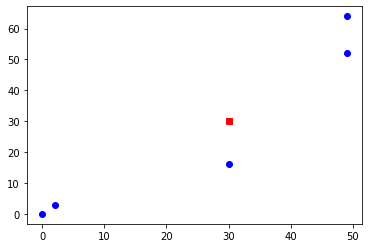

In [7]:
plt.plot(30,30, c='r', marker='s')
plt.scatter(customerz[1], customerz[2], c='b')

In [68]:
class Customer:
    def __init__(self,id,x,y,duration,demand):
        self.id = id
        self.x = x
        self.y = y 
        self.duration = duration
        self.demand = demand
        
            
    def __repr__(self):
        return str(self.id) +" "+ str(self.x) +" "+ str(self.y) + " " + str(self.duration) + " " + str(self.demand)

In [69]:
class Route: #aka chromosome
    def __init__(self, ID, depot):
        self.id = ID
        self.depot = depot #depot assigned to this route
        self.customers = list() 
        self.capacity = 0 #total of the demand
        self.ttlDistance = 0 #Ttl distance of the road
        
    def addDemand(self, d):
        self.capacity = self.capacity + d

    def addCustomer(self,c):
        self.customers.append(c)
        #print(str(self.id)+ " " +str(self.customers) + str(len(self.customers)))
        
    #getting total distance/cost of the route
    def calculTotalDistance(self):
        #print("Route:" + str(self.id)+ " customers:" + str(len(self.customers)))
        ttl = 0
        vTotal = 0
        if len(self.customers) == 0:
            return 0
        first_cust = self.customers[0]
        last_cust = self.customers[-1]
        #print(first_cust)
        #print(last_cust)
        #calculating cost between each cust
        for c in range(len(self.customers)-1):
            #print("x: " +str(self.customers[c].x) +" y: " + str(self.customers[c].y))
            ttl = ttl + Distance(self.customers[c].x,self.customers[c].y,self.customers[c+1].x,self.customers[c+1].y)
            pass
        #and between depot at the begining and end of the route since the veh needs to stop where it started
        for d in depotz:
            #get the right depot
            if (d[0]-n)-1 == self.depot:
                addtt = 0
                addtt = addtt + Distance(first_cust.x, first_cust.y, d[1], d[2])
                addtt = addtt + Distance(last_cust.x, last_cust.y, d[1], d[2])
                vTotal = ttl + addtt
                #print("Distance bw cust: " + str(ttl) + " Added to beg and end: " + str(addtt)+ " Total: " + str(vTotal))
        self.ttlDistance = vTotal
        return vTotal
        
        
    def __repr__(self):
        return "Route: " +str(self.id) +" "+ str(self.depot) + " " + str(len(self.customers))+ " Sz:"+ str(len(self.customers)) + " C:" + str(self.capacity) + " T:" + str(self.ttlDistance)

In [70]:
class Individual:
    def __init__(self):
        self.valid = False
        

In [ ]:
class Depot:
    def __init__(self, x, y) 
        self.x = x
        self.y = y
        self.routes = None

In [171]:
vehiclesMxW = depotz[0][4]
nbVehicles = 16 #np.random.randint(t, m*t)  #aka number of routes
indivPerGen = 100


def createRoutes(routes):
    count = 0
    depot = 0
    for i in range(nbVehicles):
        if depot > t-1:
            depot = 0
            count = count + 1
        r = Route(i,depot)
        routes.append(r)
        depot = depot + 1
    
    """ct = 0
    depot = 0
    for i in range(nbVehicles):
        if ct > m-1:
            depot = depot + 1
            ct = 0
        r = Route(i,depot)
        routes.append(r)
        ct = ct + 1
    #print(str(routes))
        """
def assignRdRoute(routes, nbVehicles, randVeh=False):
    for el in customerz:
        #assign a random route to each cust
        routeChoisie = np.random.randint(0, nbVehicles)
        #assign a random depot to each cust
        #depotChoisie = np.random.randint(0, t)
        cust = Customer(el[0], el[1], el[2], el[3], el[4])
        #print(str(routeChoisie) + " " + str(depotChoisie ))
        
        for rt in range(len(routes)):
            if routes[rt].id == routeChoisie :
                #print( str(routes[rt].id)+ "=="+ str(routeChoisie))
                routes[rt].addCustomer(cust)
                routes[rt].addDemand(cust.demand)
            
#create a single solution (set of routes)        
def createSolution():
    routes = list()
    
    #list of routes created
    createRoutes(routes)
    #Assign random routes to each customers
    assignRdRoute(routes,nbVehicles)
    #calculate base distance on route
    #print("Calculating base distance:")
    listOfDistance = list()
    for rt in routes:
        listOfDistance.append(rt.calculTotalDistance())
    #print()
    #print(listOfDistance)
    #print(routes)
    return routes

In [172]:
createSolution()

[Route: 0 0 2 Sz:2 C:52.0 T:93.06976153799349,
 Route: 1 1 4 Sz:4 C:70.0 T:108.22493290565689,
 Route: 2 2 3 Sz:3 C:29.0 T:80.33114887887311,
 Route: 3 3 2 Sz:2 C:29.0 T:50.251346637772116,
 Route: 4 0 1 Sz:1 C:10.0 T:42.941821107167776,
 Route: 5 1 0 Sz:0 C:0 T:0,
 Route: 6 2 3 Sz:3 C:52.0 T:150.26280700338424,
 Route: 7 3 4 Sz:4 C:66.0 T:196.8992047544995,
 Route: 8 0 3 Sz:3 C:63.0 T:116.16370319545155,
 Route: 9 1 5 Sz:5 C:51.0 T:219.9622059969722,
 Route: 10 2 4 Sz:4 C:59.0 T:123.30965878161754,
 Route: 11 3 5 Sz:5 C:78.0 T:211.47466721127074,
 Route: 12 0 2 Sz:2 C:24.0 T:101.33486828863828,
 Route: 13 1 3 Sz:3 C:71.0 T:82.33484849224321,
 Route: 14 2 5 Sz:5 C:73.0 T:189.0357857459108,
 Route: 15 3 4 Sz:4 C:50.0 T:108.3565399861057]

In [173]:
def makeGeneration(nbSolutions=indivPerGen):
    solutions = list()
    for i in range(nbSolutions):
        solutions.append(createSolution())
    return solutions

In [174]:
makeGeneration()
print(makeGeneration()[0])

[Route: 0 0 5 Sz:5 C:97.0 T:139.2009203777136, Route: 1 1 1 Sz:1 C:5.0 T:56.639209034025185, Route: 2 2 1 Sz:1 C:10.0 T:45.65084884205331, Route: 3 3 4 Sz:4 C:38.0 T:147.97841118969217, Route: 4 0 2 Sz:2 C:30.0 T:120.46641166975286, Route: 5 1 3 Sz:3 C:37.0 T:47.71088374182743, Route: 6 2 8 Sz:8 C:108.0 T:267.92649273030486, Route: 7 3 4 Sz:4 C:63.0 T:147.04233545919791, Route: 8 0 1 Sz:1 C:6.0 T:94.40338976964757, Route: 9 1 1 Sz:1 C:7.0 T:84.40379138403677, Route: 10 2 4 Sz:4 C:87.0 T:131.0461505375938, Route: 11 3 3 Sz:3 C:43.0 T:100.55342218077072, Route: 12 0 2 Sz:2 C:49.0 T:52.01612737004662, Route: 13 1 1 Sz:1 C:14.0 T:59.93329625508679, Route: 14 2 4 Sz:4 C:85.0 T:164.7752630607382, Route: 15 3 6 Sz:6 C:98.0 T:245.66975881982853]


In [175]:
#Check if every chromosom is viable to make an individual (capacity < max)
#returns viable candidates and number of healthy individuals
def checkCaryotype(indiv):
    ttl = 0
    viables = list()
    for chromo in indiv:
        if chromo.capacity < vehiclesMxW:
            ttl = ttl + 1
            viables.append(chromo)
    return viables, ttl
#print("Viables: " + str(ttl))
  
#mutate an genome
def mutate(indiv):
    #print("muatating")
    #method picker
    #print(indiv)
    meth = np.random.randint(0,1)
    if meth < 10: #move a random customer to another route
        t_from = np.random.randint(0,len(indiv)-1)
        t_to = np.random.randint(0,len(indiv)-1)
        nbCustomers = len(indiv[t_from].customers)
        nbCustomers2 = len(indiv[t_to].customers)
        which = None
        where = None
        if nbCustomers == 0:
            #print("Canceled")
            return indiv
        elif nbCustomers == 1:
            #print("Swaped")
            which = 0
        else:
            which = np.random.randint(0,nbCustomers-1)
            
        if nbCustomers2 == 0:
            #print("Canceled")
            where = 0
        elif nbCustomers2 == 1:
            #print("Swaped")
            where = 1
        else:
            where = np.random.randint(0,nbCustomers2-1)
        
        cust = indiv[t_from].customers[which]
        #print("ut")
        indiv[t_from].customers.remove(cust)
        indiv[t_to].customers.append(cust)
        #print(indiv)
        return indiv
    
    
#creates a mix of the dna of he 2 parents (splitted randomly in specified interval)
def mixDNA(p1, p2):
    #genes taken from p2 x= rand[q1;q3]
    spliter = np.random.randint(nbVehicles/4, nbVehicles/2)
    poolGenesp1 = p1[:spliter]
    spliter = (spliter - nbVehicles)
    poolGenesp2 = p2[spliter:]
    #print("Parents" + str(p1) + "| " + str(p2) + "genes: " + str(poolGenesp1) + str(poolGenesp2))
    return poolGenesp1 + poolGenesp2 

def crossover(p1,p2):
    spliter = np.random.randint(1, nbVehicles-1)
    #print("Crossing at :" + str(spliter))
    #print(len(p1))
    beginGen1 = p1[:(len(p1)-spliter)]
    beginGen2 = p2[:(len(p2)-spliter)]
    endGen1 = p1[-spliter:]
    endGen2 = p2[-spliter:]
    
    child1 = beginGen1 + endGen2
    child2 = beginGen2 + endGen1
    return child1, child2
    
#get total distance of set of routes
def getTtlDistAll(indiv):
    ttl = 0
    #print("endme")
    for r in indiv:
        ttl = ttl + r.ttlDistance
    return ttl

#get the fitest indiv from a list
def getFitest(epreuve):
    print("{} {} {} {}".format(getTtlDistAll(epreuve[0]), getTtlDistAll(epreuve[1]), getTtlDistAll(epreuve[2]), getTtlDistAll(epreuve[3])))
    val1 = 9999
    fitest1 = None
    val2= 9999
    fitest2 = None
    for el in epreuve:
        if getTtlDistAll(el) < val1:
            val1 = getTtlDistAll(el)
            fitest1 = el
    epreuve.remove(fitest1)
    for el in epreuve:
        if getTtlDistAll(el) < val2:
            val2 = getTtlDistAll(el)
            fitest2 = el
            
        #print(getTtlDistAll(el))
        #print(val)
    #print("fitest1: " + str(val1) + " fitest2: " + str(val2))
    return fitest1, fitest2
        
#returns the right element given a normalized proba as an index
def probaPick(arr, index):
    #print(index)
    if (index <= arr[0][2]): #making sure every possible value are covered (p[p(0);p(n)] but x can be < p(0))
        return arr[0][0]
    for i in range(len(arr)):
        #print("--" + str(arr[i]))
        if i < len(arr): 
            if index >= arr[i][2] and index <= arr[i+1][2]:
                #print("next")
                return arr[i][0]
        else:
            if index >= arr[i][2] and index <= 100:
                #print("snext")
                return arr[i][0]
        
def getParentByDist(arr, dist):
    for i in range(len(arr)):
        fac = 1
        caryocheck = checkCaryotype(arr[i])
        #makes unhealthy individuals twice as unlikely to be picked
        if caryocheck[1] < nbVehicles:
            fac = 2
        #print(str(fac) + " " + str(parent1) + " "+ str(getTtlDistAll(generation[i])*2))
        tmp = float(str(dist))/fac
        if getTtlDistAll(arr[i]) == tmp:
            #print("found parent")
            return arr[i]
            
#candidate = list of valid candidate, reste = unhealthy candidates unused, generation = whole generation
#Create couples, and and child returns them to be compared
def reproduce(generation):    
    parent1 = None
    parent2 = None
    listVal = list()
    
    #proba = sort generation[i] by ttotalDistance   
    #getting total dist and probability depending of them (the bigger the less likely)
    #next few lines are inspired by this : https://stackoverflow.com/questions/2772882/picking-a-random-item-based-on-probabilities
    for i in range(len(generation)):
        caryocheck = checkCaryotype(generation[i])
        #makes unhealthy individuals twice as unlikely to be picked
        if caryocheck[1] < nbVehicles:       
            listVal.append(getTtlDistAll(generation[i])*2)
        else: 
            listVal.append(getTtlDistAll(generation[i]))
    listVal.sort(reverse=True)
    ttl = sum(range(len(listVal)+1))
    cumP = 0
    for i in range(len(listVal)):
        cumP = cumP + ((i+1)/ttl)*100
        listVal[i] = (listVal[i], ((i+1)/ttl)*100, cumP)
    #print(str(listVal) + " " +  str(ttl) + " " + str(cumP))
    #picking 2 parents based on proba
    choice = (np.random.uniform(0,100))
    parent1 = probaPick(listVal,choice)
    #print("p1R" + str(parent1) + str(choice))
    parent2 = getParentByDist(generation, parent1) #to enter the loop, to make sure parent2 is different 
    parent1 = getParentByDist(generation, parent1) #from parent1
    while np.array_equal(parent1, parent2):
        choice = (np.random.uniform(0,100))
        parent2 = probaPick(listVal, choice)
        parent2 = getParentByDist(generation, parent2)
        #print(parent1)
    #print("p1 " + str(parent1))
    #print("p2 " + str(parent2))
    
    child1, child2 = crossover(parent1, parent2)
    
    return child1, child2 , parent1, parent2
    
        

In [179]:
def fitness(epochs=50):
    generation = list()
    generation = makeGeneration()
    BOG = [9999,9999]
    BOT = 9999
    ENDGEN = None
    for epoch in range(epochs):
        print("Generation:" + str(epoch))
        #print(generation)
        nextGeneration = list()
        while len(nextGeneration) < indivPerGen : 
            #print("Size nextGen:" + str(len(nextGeneration)) + "Gen: "+ str(i))
            validCand = list()
            invalidCand = list()
            
            
            child1, child2, parent1, parent2 = reproduce(generation)
            
            child1 = mutate(child1)
            child2 = mutate(child2)
            """
            fitlist = [parent1, parent2, child1, child2]
            child1, child2  = getFitest(fitlist)
            """
            nextGeneration.append(child1)
            nextGeneration.append(child2)
        #print("Size next gen: " + str(len(nextGeneration)))
        f1, f2 = getFitest(nextGeneration)
        print("BOG: " + str(getTtlDistAll(f1)) + " " + str(getTtlDistAll(f2)))
        BOG = [getTtlDistAll(f1),getTtlDistAll(f2)]
        if getTtlDistAll(f1) < BOT: 
            BOT = getTtlDistAll(f1)
            ENDGEN = epoch
        if getTtlDistAll(f2) < BOT:
            BOT = getTtlDistAll(f2)
            ENDGEN = epoch
        generation = nextGeneration
        nextGeneration = []
        print("")
    print("BOT: {} at: {}".format(BOT, ENDGEN))
    for el in generation:
        print("--")
        print(el)

In [180]:
fitness()

Generation:0
2225.0603541680234 1631.4246089468681 2206.115622980328 1829.362336339262
BOG: 1580.963789470015 1604.5923592596541

Generation:1
1869.8076845936691 2116.304379932314 2149.980288569395 1886.33310520549
BOG: 1523.6840693453717 1527.970464306151

Generation:2
1842.207861643983 2127.564652586533 1608.9581105404675 2021.7960106808864
BOG: 1407.120725937397 1413.7654815799995

Generation:3
1551.8966389682678 1789.7606307234287 1576.919690247142 1578.3108453571435
BOG: 1396.6347229590879 1425.6306528460898

Generation:4
1537.423000882408 1474.1127609496243 1628.5789797386315 1682.0426385241933
BOG: 1229.5670989403739 1297.2789817382175

Generation:5
1720.1365905440284 1809.3675193209779 1643.6032941697501 1792.8403071589414
BOG: 1326.3943539328845 1397.8593060532835

Generation:6
1438.5430389762066 1773.1986173804169 1553.9599385787305 1637.9146974551386
BOG: 1326.9178305143653 1337.4634950663392

Generation:7
1543.2926921694905 1666.829685650786 1496.493161443247 1514.652861245

In [356]:
print(np.random.uniform(0,100))

15.58488550289141


In [40]:
a = [0,1,2,3,4,5,6]
print(a[:4])

[0, 1, 2, 3]
